In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [65]:
df = pd.read_csv('/content/heart dieseas (2).zip')

In [66]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [68]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [69]:
df.shape

(920, 16)

In [70]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [74]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [75]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [76]:
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [77]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [78]:
# For numerical columns
num_cols = ['ca', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
cat_cols = ['thal', 'slope', 'restecg', 'exang']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-78-1753813134.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [79]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [80]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [81]:
df.drop(['id'], axis=1, inplace=True)

In [82]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [83]:
df['thal'].value_counts()

,count
thal,
normal,682
reversable defect,192
fixed defect,46


In [84]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


<Axes: xlabel='num', ylabel='count'>

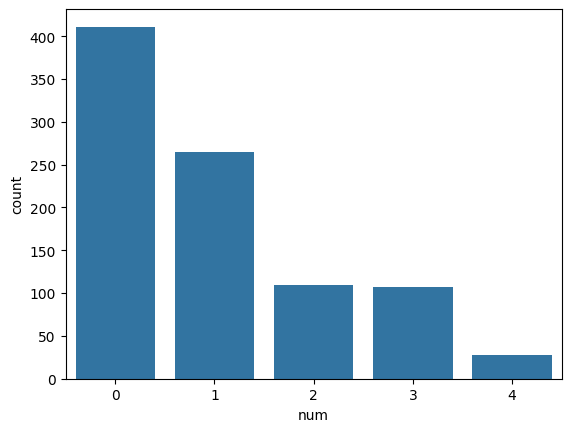

In [85]:
sns.countplot(x = 'num' ,data=df)

<Axes: xlabel='num', ylabel='thal'>

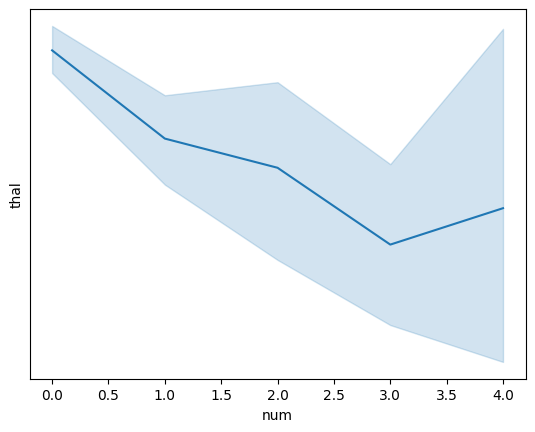

In [86]:
sns.lineplot(x = 'num',y = 'thal' ,data=df)

In [87]:
#here num the target column has classified in the level of defect or dieses we r converting it to just yes or no
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [88]:
df['num'].value_counts()

,count
num,
1,509
0,411


1 --> Defective Heart

0 --> Healthy Heart

In [89]:
x = df.drop(columns = ['num', 'dataset'],axis=1)
y = df['num']

In [90]:
print(x)

     age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
916   62    Male   typical angina     130.0  139.0  False  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
918   58    Male     asymptomatic     130.0  385.0   True    lv hypertrophy   
919   62    Male  atypical angina     120.0  254.0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca      

In [91]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

In [92]:
df.drop('dataset', axis=1, inplace=True)

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [94]:
df['thal'] = df['thal'].map({'normal': 1, 'fixed defect': 0, 'reversable defect':2})

In [95]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [96]:
df['slope'].value_counts()

,count
slope,
flat,654
upsloping,203
downsloping,63


In [97]:
df['restecg'].value_counts()

,count
restecg,
normal,553
lv hypertrophy,188
st-t abnormality,179


In [98]:
df['restecg'] = df['restecg'].map({'normal': 1, 'lv hypertrophy': 0, 'st-t abnormality':2})

In [99]:
df['slope'] = df['slope'].map({'flat': 1, 'upsloping': 0, 'downsloping':2})

In [100]:
df['cp'] = df['cp'].map({'asymptomatic': 1, 'non-anginal': 0, 'atypical angina':2, 'typical angina':3})

In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,2,0.0,0,0
1,67,1,1,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,1,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,130.0,250.0,0,1,187.0,0,3.5,2,0.0,1,0
4,41,0,2,130.0,204.0,0,0,172.0,0,1.4,0,0.0,1,0


In [102]:
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [104]:
print(x.shape, X_train.shape, X_test.shape)

(920, 13) (736, 13) (184, 13)


In [111]:
# Regenerate x and y dataframes
x = df.drop(columns='num', axis=1)
y = df['num']

# Split the data again
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Now fit and evaluate the models
models = {
    'lg' : LogisticRegression(),
    'rf' : RandomForestClassifier()
}

for name, algo in models.items():
  algo.fit(X_train, Y_train)
  y_pred = algo.predict(X_test)
  print(name, accuracy_score(Y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lg 0.7880434782608695
rf 0.8206521739130435


In [108]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [112]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8152173913043478

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,2,0.0,0,0
1,67,1,1,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,1,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,130.0,250.0,0,1,187.0,0,3.5,2,0.0,1,0
4,41,0,2,130.0,204.0,0,0,172.0,0,1.4,0,0.0,1,0


In [116]:
input_data = (63,1,3,145,238,1,0,150,0,2.3,2,0,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
